In [1]:
from lbm.datasets.housing_locations import Preprocessor
import pandas as pd

processor = Preprocessor()
train_loader, val_loader, test_loader = processor.get_loaders()

feature_names = processor.get_feature_names()

df1 = pd.DataFrame(columns=feature_names)
df2 = pd.DataFrame(columns=['NEAR OCEAN'])
for X, Y in train_loader:
    for x in X:
        df1.loc[len(df1)] = x.numpy()
    for y in Y:
        df2.loc[len(df2)] = y.numpy()
display(df1)
display(df2)

,latitude,longitude
0,34.020000,-118.320000
1,33.880001,-117.790001
2,32.700001,-117.129997
3,33.970001,-118.309998
4,36.779999,-119.760002
...,...,...
16341,33.939999,-118.239998
16342,34.000000,-118.309998
16343,34.040001,-117.959999
16344,33.880001,-117.919998


,NEAR OCEAN
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
16341,0.0
16342,0.0
16343,0.0
16344,0.0


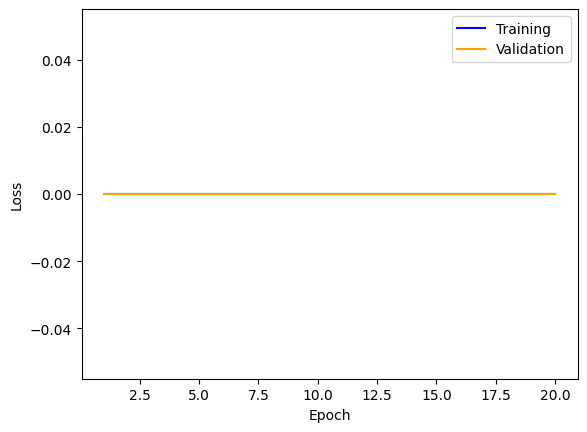

In [8]:
from lbm.models import Logistic
from lbm.workflow import train_and_validate
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np

means, stds = processor.get_z_score()
model = Logistic(len(feature_names), means, stds)

optimizer = optim.SGD(model.parameters(), weight_decay=0.01)
loss_fn = nn.CrossEntropyLoss()
train_losses, val_losses = train_and_validate(
    model,
    train_loader,
    val_loader,
    optimizer,
    loss_fn,
    epochs=20
)
plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label='Training', color='blue')
plt.plot(np.arange(1, len(val_losses) + 1), val_losses, label='Validation', color='orange')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()